In [116]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
from wordcloud import WordCloud



In [103]:
%load_ext kedro.ipython
%reload_kedro
context.catalog.list()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[09/04/24 11:27:20] INFO     Resolved project path as:                                              ]8;id=742182;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=765075;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/04/24 11:27:21] INFO     Kedro project goodreads-predictor                                      ]8;id=774128;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=361953;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=658068;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=681477;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=75746;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=662241;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\


[
    'books_raw',
    'books_loaded',
    'publisher_consolidation',
    'price_by_isbn_input',
    'price_by_isbn',
    'book_genres',
    'title_embeddings_original',
    'authors_embeddings',
    'description_embeddings',
    'open_library_book_api_info_input',
    'open_library_book_api_info',
    'filtered_books',
    'exclusions_summary',
    'scope_waterfall_plot',
    'books_features',
    'feature_cutoffs',
    'factor_lumper',
    'model_train',
    'model_valid',
    'model_test',
    'flaml_model_trained',
    'flaml_model_test_results',
    'flaml_regressor_scatterplot',
    'all_model_results',
    'parameters',
    'params:experiment_names',
    'params:FEATURES',
    'params:TARGET',
    'params:model_config',
    'params:model_config.time_budget',
    'params:model_config.metric',
    'params:model_config.task',
    'params:model_config.estimator_list',
    'params:target_col',
    'params:threshold',
    'params:is_top_n',
    'params:is_percentage',
    'params:tes

# Data handling

In [104]:

feature_engineering = catalog.load("books_features")

embeddings = catalog.load("description_embeddings")


                    INFO     Loading data from model_train (ParquetDataset)...                  ]8;id=951693;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=512296;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from books_features (ParquetDataset)...               ]8;id=235820;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=947434;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from description_embeddings (ParquetDataset)...       ]8;id=532785;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=981778;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

[09/04/24 11:27:22] INFO     Loading data from model_test (ParquetDataset)...                   ]8;id=156174;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=565796;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from model_valid (ParquetDataset)...                  ]8;id=593868;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=654332;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [106]:
embeddings

,isbn13,Description_embedding
0,9780439554893,"[0.006243001203984022, 0.23475420475006104, 0...."
1,9780060920081,"[-0.11963535845279694, -0.18035607039928436, -..."
2,9780439682589,"[0.09263068437576294, -0.11552535742521286, 0...."
3,9780380727506,"[0.12158146500587463, 0.1508733481168747, 0.01..."
4,9780439655484,"[0.2642887830734253, 0.19447514414787292, -0.1..."
...,...,...
11118,9789722330978,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11119,9789722332200,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11120,9789722331685,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11121,9780140131963,"[-0.18219724297523499, 0.03799523040652275, 0...."


In [107]:
# Merge train, test and validation data
data = feature_engineering

In [108]:
# Merge embeddings dataframe with train dataframe using isbn13 column
merged_df = pd.merge(data, embeddings, on='isbn13')

In [109]:
merged_df

,title,isbn,isbn13,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,DescriptionISBN,genre,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level,Description_embedding
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,9780743470797,poetry,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,"[-0.08548174798488617, -0.22054697573184967, -..."
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,9781592000678,non-fiction,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,"[0.15061837434768677, -0.27005329728126526, 0...."
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,9780385516488,"mystery, thriller, crime",0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers,"[-0.059056252241134644, 0.30653002858161926, -..."
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,9780761104841,non-fiction,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers,"[0.16539974510669708, -0.09982884675264359, -0..."
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,9780425197455,"mystery, thriller, crime",0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers,"[0.2462715208530426, -0.10841662436723709, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,9782266111102,fiction,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers,"[0.12111280113458633, 0.3750728666782379, 0.02..."
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,9788495618771,"mystery, thriller, crime",0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers,"[-0.17984066903591156, -0.06695215404033661, -..."
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,9785040019526,fiction,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,"[-0.05408739298582077, -0.15301334857940674, -..."
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,9784091252012,"comics, graphic",0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,"[-0.014087690971791744, -0.285403311252594, -0..."


In [110]:
# Count number of missing values in each column
merged_df.isna().sum()


title                            0
isbn                             0
isbn13                           0
most_common_author               0
average_rating                   0
num_pages                        0
ratings_count                    0
text_reviews_count               0
publisher                        0
Price                            0
language_code                    0
Description                      0
DescriptionISBN                  0
genre                            0
text_reviews_percentage          0
AuthorFameLevel                  0
book_count_category              0
publisher_book_count_category    0
PublisherPriceCategory           0
book_length_category             0
engagement_level                 0
Description_embedding            0
dtype: int64

In [112]:
merged_df

,title,isbn,isbn13,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,DescriptionISBN,genre,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level,Description_embedding
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,9780743470797,poetry,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,"[-0.08548174798488617, -0.22054697573184967, -..."
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,9781592000678,non-fiction,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,"[0.15061837434768677, -0.27005329728126526, 0...."
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,9780385516488,"mystery, thriller, crime",0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers,"[-0.059056252241134644, 0.30653002858161926, -..."
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,9780761104841,non-fiction,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers,"[0.16539974510669708, -0.09982884675264359, -0..."
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,9780425197455,"mystery, thriller, crime",0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers,"[0.2462715208530426, -0.10841662436723709, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,9782266111102,fiction,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers,"[0.12111280113458633, 0.3750728666782379, 0.02..."
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,9788495618771,"mystery, thriller, crime",0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers,"[-0.17984066903591156, -0.06695215404033661, -..."
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,9785040019526,fiction,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,"[-0.05408739298582077, -0.15301334857940674, -..."
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,9784091252012,"comics, graphic",0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,"[-0.014087690971791744, -0.285403311252594, -0..."


In [113]:
# Get a count of unique values from the genre column to setup number of clusters
genre_counts = merged_df['genre'].nunique()
genre_counts

10

# Clustering made with sentence transformer embeddings of descriptions

## Clustering 

                    WARNING  c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\umap\umap_.py:1 ]8;id=261171;file://c:\Users\PC\.conda\envs\goodread_env\lib\warnings.py\warnings.py]8;;\:]8;id=893795;file://c:\Users\PC\.conda\envs\goodread_env\lib\warnings.py#109\109]8;;\
                             945: UserWarning: n_jobs value 1 overridden to 1 by setting                           
                             random_state. Use no seed for parallelism.                                            
                               warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting                        
                             random_state. Use no seed for parallelism.")                                          
                                                                                                                   

Silhouette Score: 0.39837465


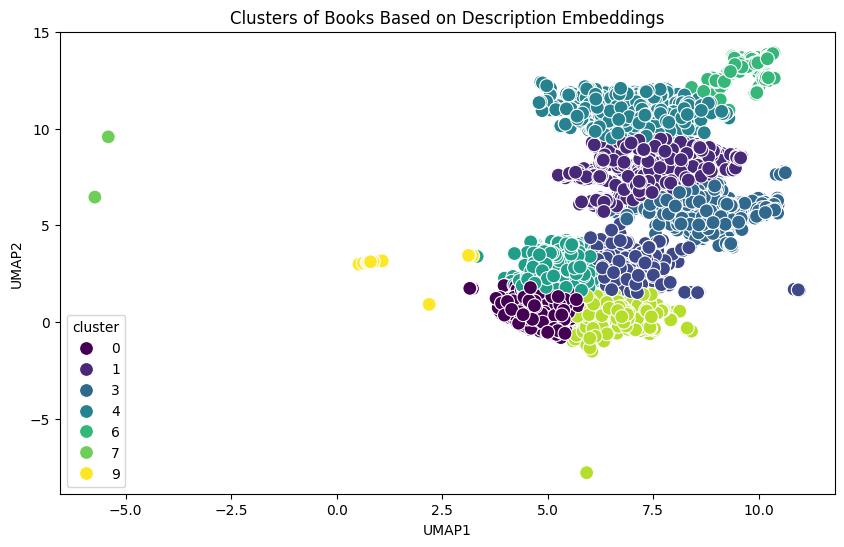

In [114]:

# Assume 'description_embedding' column contains list-like vectors (multi-dimensional)
# Convert the 'description_embedding' column to a numpy array if it's not already
embeddings = np.vstack(merged_df['Description_embedding'].values)

# Flatten the embeddings to 1D
embeddings = embeddings.reshape(embeddings.shape[0], -1)

# Lower the dimension of the description_embedding column using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)  # Use 2 components for better visualization
reduced_embeddings = umap_model.fit_transform(embeddings)

# Perform KMeans clustering on the reduced embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(reduced_embeddings)

# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Add the reduced dimensions to the DataFrame for visualization
merged_df['UMAP1'] = reduced_embeddings[:, 0]
merged_df['UMAP2'] = reduced_embeddings[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=merged_df, hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Books Based on Description Embeddings')
plt.show()





## Wordcloud of each cluster

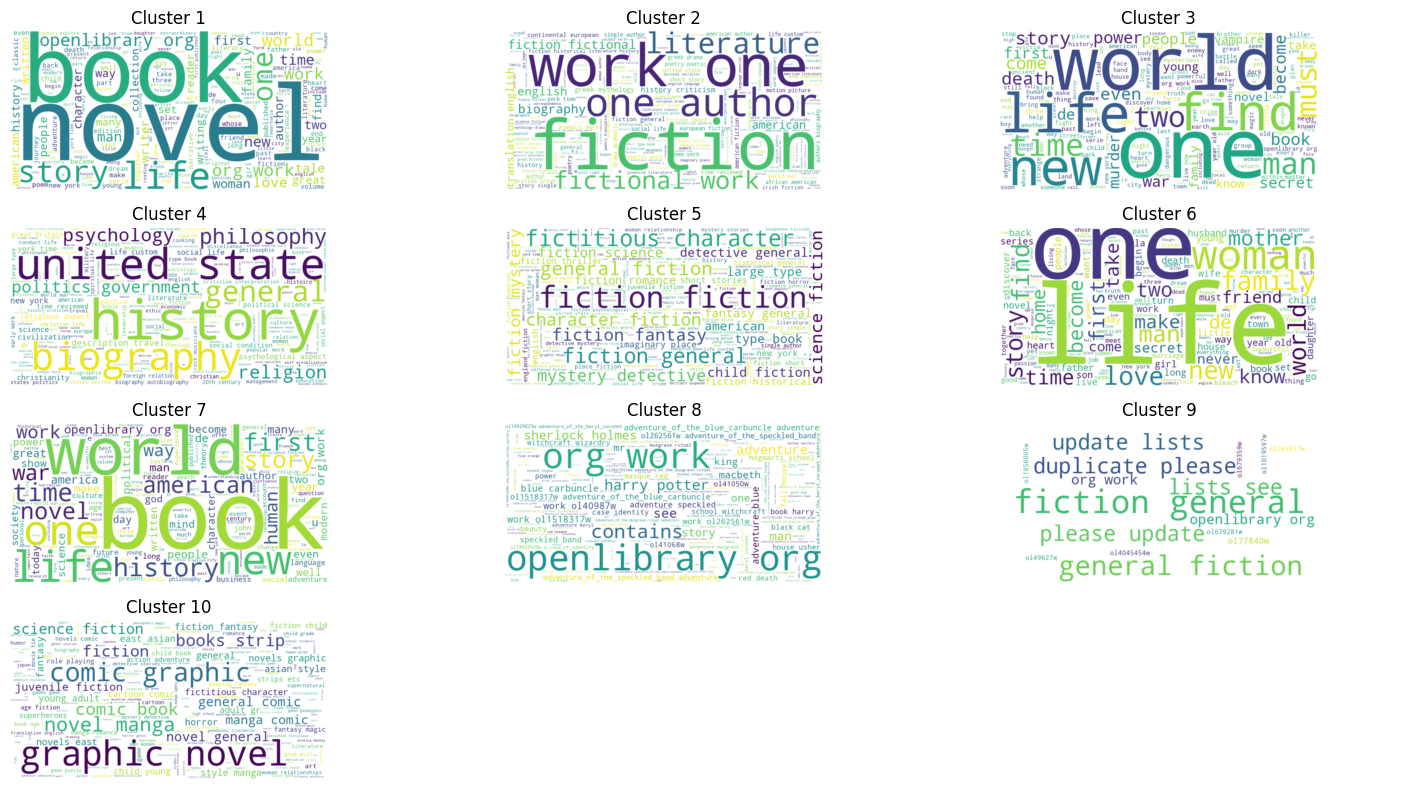

In [119]:

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Define a function to generate a word cloud for a given cluster
def generate_wordcloud(cluster_data):
    text = ' '.join(cluster_data['Description'].values)

    # Remove stopwords from the text using NLTK
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stopwords])

    # Lemmatize the text using NLTK

    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Generate word clouds for each cluster
wordclouds = []
for cluster_id in merged_df['cluster'].unique():
    cluster_data = merged_df[merged_df['cluster'] == cluster_id]
    wordcloud = generate_wordcloud(cluster_data)
    wordclouds.append(wordcloud)

# Determine the grid size for subplots
n_clusters = len(wordclouds)
n_cols = 3
n_rows = (n_clusters + n_cols - 1) // n_cols

# Display the word clouds in a grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i in range(n_clusters):
    axes[i].imshow(wordclouds[i], interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i+1}')

# Hide any unused subplots
for i in range(n_clusters, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Heatmap genres/cluster labels

In [120]:
# Comparison of the clustering labels with the genre column of the dataset
pd.crosstab(merged_df['cluster'],merged_df['genre'])

# Create a dataframe with the cluster labels and the genre column
cluster_genre_df = pd.DataFrame({'cluster': merged_df['cluster'], 'genre': merged_df['genre']})



In [121]:
cluster_genre_df

,cluster,genre
0,5,poetry
1,1,non-fiction
2,8,"mystery, thriller, crime"
3,3,non-fiction
4,4,"mystery, thriller, crime"
...,...,...
8379,4,fiction
8380,2,"mystery, thriller, crime"
8381,5,fiction
8382,6,"comics, graphic"


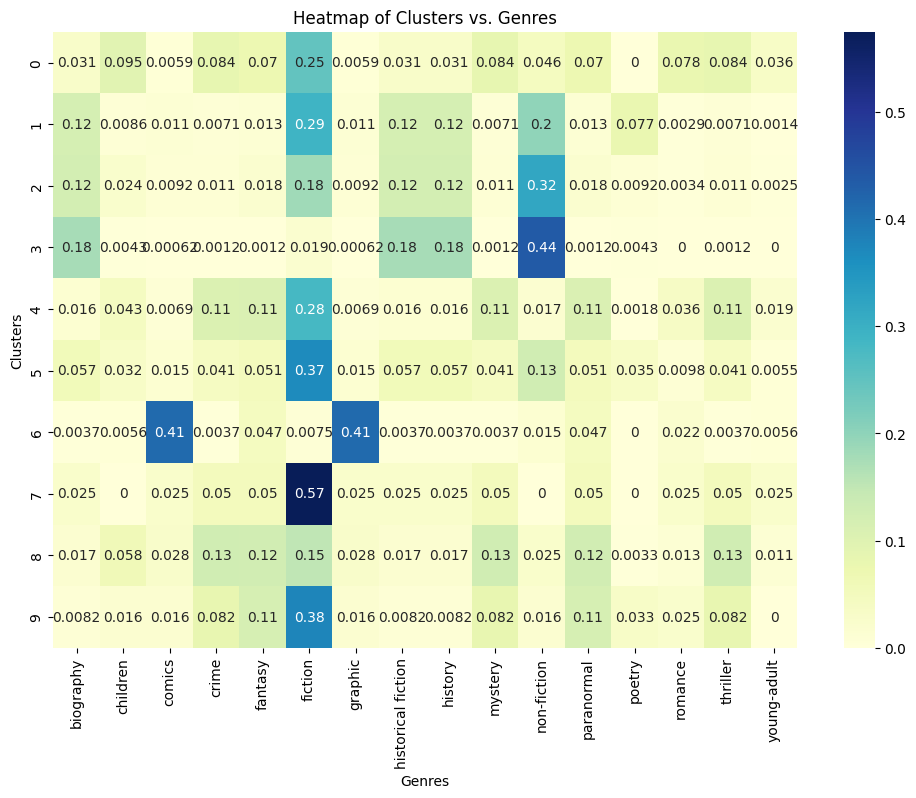

In [122]:

# One-hot encode the genres
cluster_genre = cluster_genre_df['genre'].str.get_dummies(sep=', ')

# Combine the one-hot encoded genres with the cluster labels
cluster_genre_df_combined = cluster_genre_df[['cluster']].join(cluster_genre)

# Create a contingency table by grouping by clusters and summing the genre counts
contingency_table = cluster_genre_df_combined.groupby('cluster').sum()

# Normalize the contingency table by the number of items in each cluster
contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Clusters vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Clusters')
plt.show()
